## Stroke Prediction using ML and DL

A brain stroke occurs when blood supply to a part of the brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. This can lead to brain damage and loss of function.
Early detection of stroke is crucial because it can significantly improve the chances of survival and recovery. Immediate medical intervention can prevent severe complications such as permanent brain damage, paralysis, or even death. However, traditional detection methods, like medical imaging, may be time-consuming or unavailable in remote locations. Therefore, a faster, more accessible diagnostic approach is essential.



## Table of Contents

- [Introduction](#intro)
- [About the data set](#disc)
- [Exploring and Visualizig the Data](#tryf)
- [Data encoding](#tryfR)
- [exploring K-Nearest Neighbors results](#trynd)
- [exploring Random Forest Classifier](#tryrd)
- [exploring Logistic Regression](#try4th) 
- [exploring Decision Tree Classifier](#try5th)    
- [exploring Gradient Boosting Classifier](#try6)   
- [exploring Support Vector Machine classifier](#try7)    
- [exploring XGBoost Classifier](#tryoc)    
- [conclusin](#cnc)
- [citattion](#citPreparing)

<a id='intro'></a>
### Introduction
Brain stroke is a leading cause of disability and death worldwide, with early detection being critical to reducing its devastating impact. Traditional stroke detection methods, such as medical imaging and clinical assessment, are time-consuming, expensive, and not always accessible, especially in resource-limited or rural areas. There is a need for an efficient, accurate, and accessible solution to detect stroke risk early, enabling prompt medical intervention.
The current healthcare system lacks an easy-to-use, real-time stroke detection tool that can analyse multiple risk factors and medical data to predict the likelihood of a stroke.
This limitation delays treatment, leading to poor outcomes, such as long-term disability or death.
The challenge lies in developing a system that can handle the complexity of stroke diagnosis, provide early warnings, and be widely accessible.



<a id='disc'></a>
### About the Dataset
- Size: 50,000 patient records
- Purpose: Predict stroke likelihood based on patient characteristics
- Type: Synthetic healthcare data for machine learning
#### Key Features (12 attributes):
- Demographics: Gender, Age, Marital Status
- Medical History: Hypertension, Heart Disease
- Lifestyle: Work Type, Residence, Smoking Status
- Health Metrics: BMI, Average Glucose Level
- Target: Stroke occurrence (0/1)
#### Dataset Statistics
- Total Records: 50,000 patients
- Age Range: 18–90 years (Mean: 54.0 years)
- Stroke Prevalence: 4.85% (2,427 cases)
- Missing Data: 2,500 BMI values (5%) → handled via median imputation
#### Class Distribution Challenge
- Imbalanced Data: 95.15% no-stroke vs 4.85% stroke
- Model Issue: High accuracy but low sensitivity to stroke cases
- Solution: Applied Random Oversampling for balanced training
#### Key Risk Factors
- Age: Main predictor (risk increases with age)
- Hypertension: Strongly linked to stroke occurrence
- Heart Disease: Major contributing factor
- BMI & Glucose: Important continuous indicators
- Gender: Nearly balanced across dataset
#### Data Quality Notes
- Clean dataset with minimal preprocessing
- Categorical variables encoded for ML compatibility
- Synthetic data ensures privacy with realistic patterns


<a id='intro'></a>
## Data Preprocessing

In [61]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('synthetic_stroke_data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Female,80.3,0,0,Yes,Govt_job,Urban,170.38,18.4,Unknown,0
1,2,Female,89.4,0,0,Yes,Self-employed,Urban,186.89,19.6,formerly smoked,0
2,3,Male,87.5,0,0,Yes,Children,Urban,118.42,34.7,never smoked,0
3,4,Male,19.7,0,0,Yes,Private,Urban,226.01,27.1,smokes,0
4,5,Male,85.2,0,0,Yes,Children,Rural,229.64,27.6,Unknown,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50000 non-null  int64  
 1   gender             50000 non-null  object 
 2   age                50000 non-null  float64
 3   hypertension       50000 non-null  int64  
 4   heart_disease      50000 non-null  int64  
 5   ever_married       50000 non-null  object 
 6   work_type          50000 non-null  object 
 7   Residence_type     50000 non-null  object 
 8   avg_glucose_level  50000 non-null  float64
 9   bmi                47500 non-null  float64
 10  smoking_status     50000 non-null  object 
 11  stroke             50000 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.6+ MB


In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,47500.000000,50000.000000
mean,25000.500000,54.021022,0.151220,0.102660,159.964413,27.540118,0.048540
std,14433.901067,20.809341,0.358267,0.303517,51.890421,7.216627,0.214906
min,1.000000,18.000000,0.000000,0.000000,70.010000,15.000000,0.000000
25%,12500.750000,36.100000,0.000000,0.000000,114.715000,21.300000,0.000000
50%,25000.500000,54.000000,0.000000,0.000000,160.100000,27.600000,0.000000
75%,37500.250000,72.100000,0.000000,0.000000,205.035000,33.800000,0.000000
max,50000.000000,90.000000,1.000000,1.000000,250.000000,40.000000,1.000000


In [5]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
data.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  2500
smoking_status          0
stroke                  0
dtype: int64

In [7]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)

In [8]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
data.shape

(50000, 12)

## Data Analysis and Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

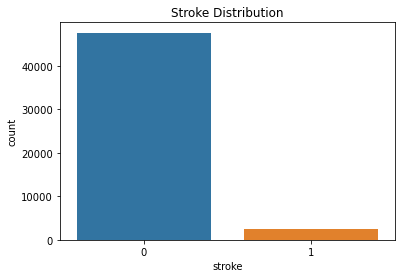

In [11]:
sns.countplot(x='stroke', data=data)
plt.figure(figsize=(6,5))
plt.title('Stroke Distribution')
plt.show()

The count plot clearly illustrates the distribution of our target variable, stroke (0 for No Stroke, 1 for Stroke), and confirms the severe class imbalance you will face in our Machine Learning project.


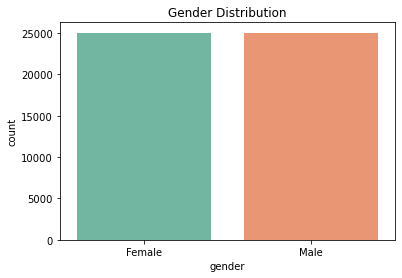

In [12]:
plt.figure(figsize=(6,5))
sns.countplot(data=data, x='gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()

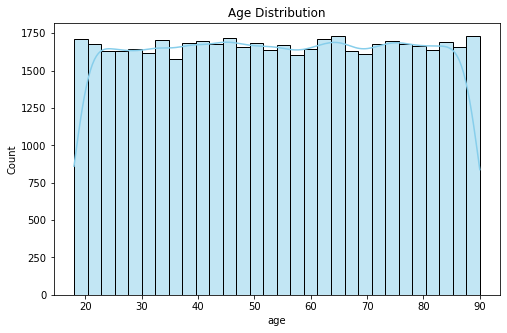

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()

The age distribution is unusually flat and evenly spread from about 30 to 90, unlike real populations that are usually skewed younger. This suggests the data may be synthetic or intentionally balanced. A wide age range is useful for model generalization, but age (along with BMI and glucose) should still be scaled before training ML models.


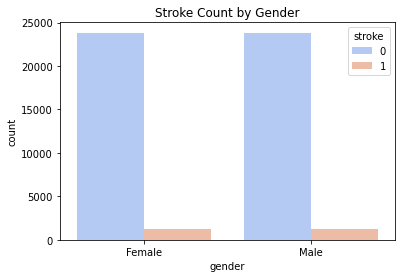

In [14]:
plt.figure(figsize=(6,5))
sns.countplot(data=data, x='gender', hue='stroke', palette='coolwarm')
plt.title("Stroke Count by Gender")
plt.show()

Even though there are more female records overall, the share of stroke cases is higher within the male group. This implies that males may have a slightly greater stroke risk in this dataset. Because the stroke rate differs between genders, gender will likely be a useful feature for the model — it can help the model assign different base probabilities for stroke.


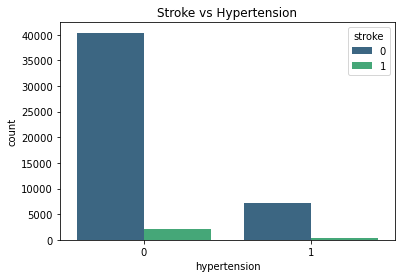

In [15]:
plt.figure(figsize=(6,5))
sns.countplot(data=data, x='hypertension', hue='stroke', palette='viridis')
plt.title("Stroke vs Hypertension")
plt.show()

###### By comparing the proportions, we can infer a relationship:
- Among individuals with no hypertension, the percentage of those who had a stroke is very small.
- Among individuals with hypertension, the percentage of those who had a stroke appears to be higher than in the non-hypertensive group.

###### This visually supports the common medical understanding that hypertension is a risk factor for stroke. While not everyone with hypertension will have a stroke, having hypertension increases the likelihood compared to not having it.


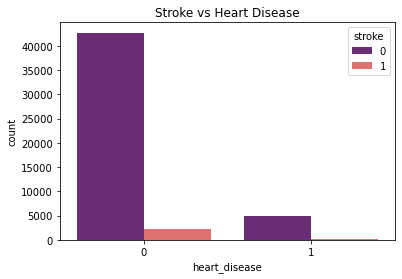

In [16]:
plt.figure(figsize=(6,5))
sns.countplot(data=data, x='heart_disease', hue='stroke', palette='magma')
plt.title("Stroke vs Heart Disease")
plt.show()

###### Comparing the proportions, a similar pattern to hypertension emerges:
- Among individuals with no heart disease, the percentage of those who had a stroke is very low.
- Among individuals with heart disease, the percentage of those who had a stroke appears to be higher than in the group without heart disease.

###### This graph visually reinforces the strong medical understanding that heart disease is a significant risk factor for stroke. While not every individual with heart disease will experience a stroke, the presence of heart disease seems to increase the likelihood of stroke.


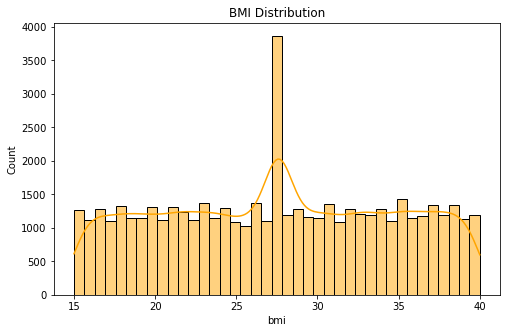

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(data['bmi'].dropna(), kde=True, color='orange')
plt.title("BMI Distribution")
plt.show()

#### This histogram shows that BMI values are spread fairly evenly between roughly 15 and 40, but there is a noticeable spike around BMI ≈ 28. 
#### That peak suggests the dataset has a large cluster of samples around that value. The rest of the distribution looks flatter than what we normally see in real populations — which again hints that this may be synthetic or balanced data. Overall, BMI covers a wide range, and because of this variation, it should be a useful numerical feature for the model.


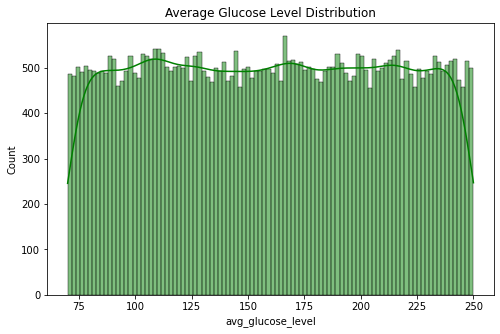

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data['avg_glucose_level'], bins=100, kde=True, color='green')
plt.title("Average Glucose Level Distribution")
plt.show()

Two Peaks (Bimodal Distribution): The chart shows two clear groups of people based on their glucose levels.First Peak – Normal Range: The first group has glucose levels around 110–120, which is likely the normal or healthy range.
Second Peak – High Range: The second group has glucose levels around 200–210, which is much higher and may include people with diabetes or pre-diabetes, who are at greater risk of stroke.Artificial Look: The sharp peaks and clean gaps suggest that this data might be synthetic (generated to represent different health groups) rather than real-world measurements.
Conclusion: The chart shows that average glucose level is an important factor to include when predicting stroke risk.


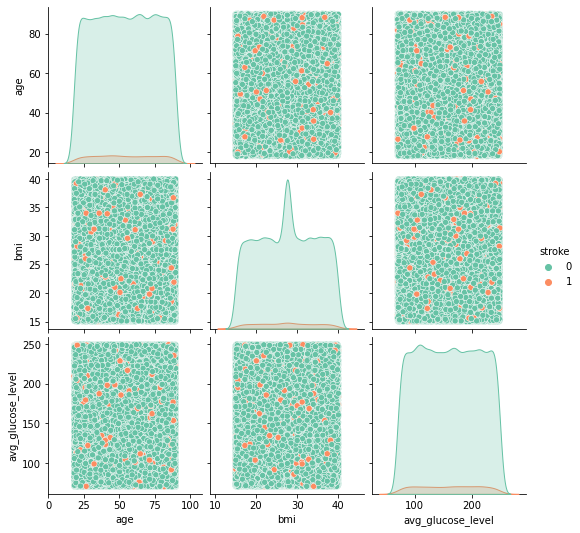

In [19]:
sns.pairplot(data, hue='stroke', vars=['age','bmi','avg_glucose_level'], palette='Set2')
plt.show();

- Diagonal Plots (Feature Distributions):
    - Age: People who had a stroke tend to be significantly older than those who didn’t. The clear shift in the stroke distribution toward higher ages shows that age is a strong predictor of stroke risk.
    - BMI: The BMI distributions for both groups are almost identical. This indicates that BMI alone doesn’t strongly distinguish between stroke and non-stroke cases—it may only matter in combination with other factors.
    - Average Glucose Level: The stroke group has many more individuals with very high glucose levels, creating a visible second peak in the distribution. This confirms that avg_glucose_level is also a powerful indicator of stroke risk.
- Off-Diagonal Plots (Feature Relationships):
    - Age vs. Avg Glucose Level: This is the most telling relationship. Stroke cases (orange dots) cluster in the top-right region, showing that individuals who are older and have high glucose levels are much more likely to experience a stroke.
    - Age vs. BMI: Stroke cases are spread across different BMI values, meaning that BMI’s relationship with stroke is either weak or indirect.
    - BMI vs. Avg Glucose Level: No clear pattern or separation is visible, suggesting that these two variables together don’t strongly predict stroke.
- The pairplot highlights that age and average glucose level are the most informative predictors for stroke. Their combined effect—especially among older adults with high glucose levels—is strongly linked to increased stroke risk.
- In contrast, BMI contributes less to prediction power.
- A machine learning model can effectively learn patterns like “If age > 60 and avg_glucose_level > 180, then stroke risk is high.”


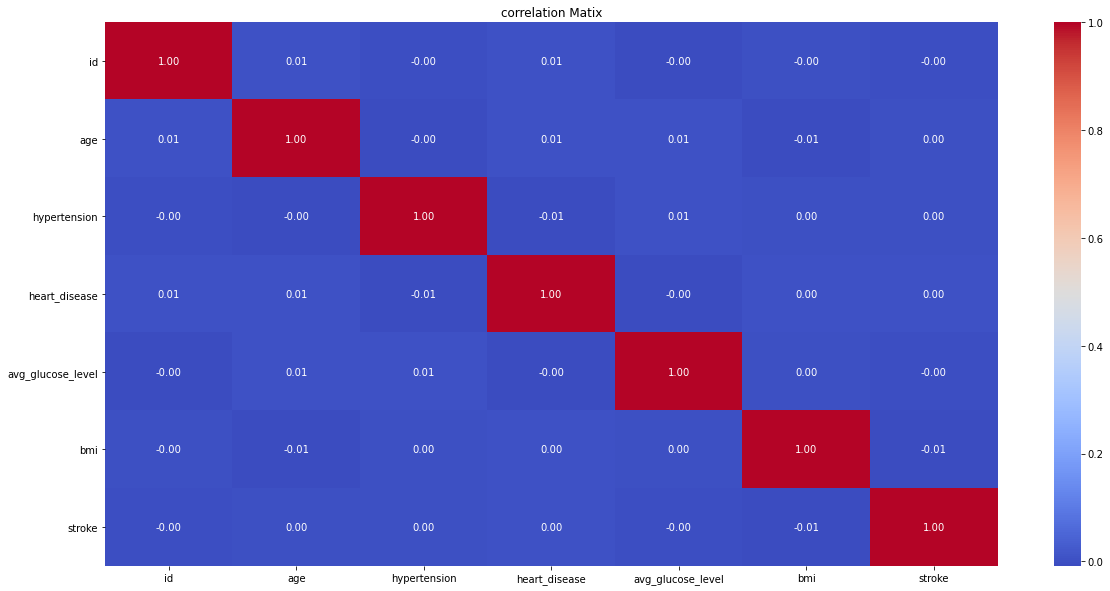

In [20]:
plt.figure(figsize=(20, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("correlation Matix")
plt.show()

In [21]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<a id='tryfR'></a>
## Data Encoding

### Over Sampling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification

In [23]:
data.drop('id', axis=1, inplace=True)

In [24]:

data = pd.get_dummies(data, columns=['gender','ever_married','work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [25]:
X = data.drop('stroke', axis=1)
y = data['stroke']
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

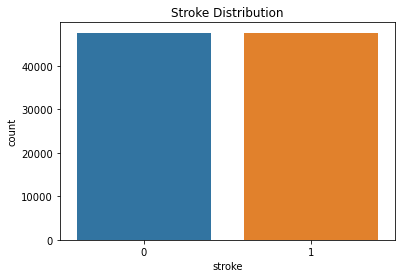

In [26]:
# Merge X_res and y_res
merged_df = pd.concat([X_res, y_res], axis=1)
plt.figure(figsize=(6, 5))
sns.countplot(x='stroke', data=merged_df)
plt.title('Stroke Distribution')
plt.show()

In [27]:
X_res.shape

(95146, 14)

In [28]:
y_res.shape

(95146,)

<a id='trynd'></a>
### KNN Classifier

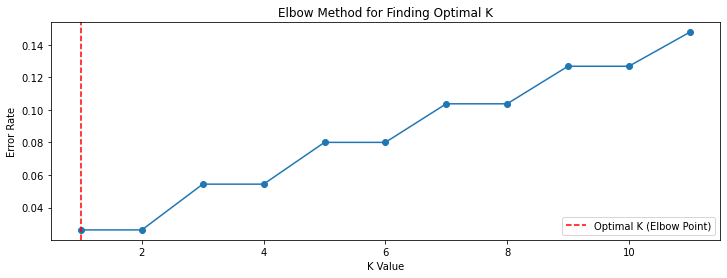

In [29]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#data = pd.get_dummies(data, columns=['ever_married'], drop_first=True)
data_Ctrl= y_res
data_sv = X_res#data.drop(['stroke'], axis='columns')
X_train, X_test, y_train, y_test = train_test_split(data_sv, data_Ctrl, test_size=0.15, random_state=20)
k_values = range(1, 12)
error_rates = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)
plt.figure(figsize=(12, 4))
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
xcalc=error_rates.index(min(error_rates))+1
plt.axvline(x=xcalc, linestyle='--', color='red', label="Optimal K (Elbow Point)")
plt.legend()
plt.show()

In [30]:
KNN = KNeighborsClassifier(n_neighbors=xcalc)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
y_pred = KNN.predict(X_test)

print(100*accuracy_score(y_test,y_pred))

97.37247757847534


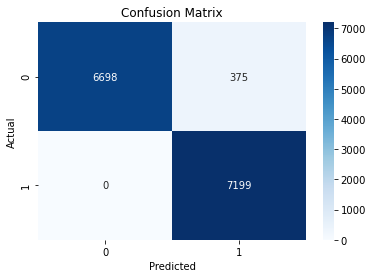

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
#le = LabelEncoder()
#data['gender'] = le.fit_transform(data['gender'])  
#data['ever_married'] = le.fit_transform(data['ever_married'])
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#pd.DataFrame(X_train_scaled, columns=X_train.columns)
#data = pd.get_dummies(data, columns=['work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [34]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,80.3,0,0,170.38,18.4,0,0,1,1,0,0,1,0,0,0
1,89.4,0,0,186.89,19.6,0,0,1,0,0,1,1,1,0,0
2,87.5,0,0,118.42,34.7,0,1,1,0,0,0,1,0,1,0
3,19.7,0,0,226.01,27.1,0,1,1,0,1,0,1,0,0,1
4,85.2,0,0,229.64,27.6,0,1,1,0,0,0,0,0,0,0


In [35]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
#X_train.shape

<a id='tryrd'></a>
### Random Forest Classifier

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [39]:
rf_model.predict_proba(X_test_scaled)

array([[0.        , 1.        ],
       [0.88      , 0.12      ],
       [0.95333333, 0.04666667],
       ...,
       [0.        , 1.        ],
       [0.98      , 0.02      ],
       [0.93333333, 0.06666667]])

In [40]:
y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9987387892376681


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7073
           1       1.00      1.00      1.00      7199

    accuracy                           1.00     14272
   macro avg       1.00      1.00      1.00     14272
weighted avg       1.00      1.00      1.00     14272



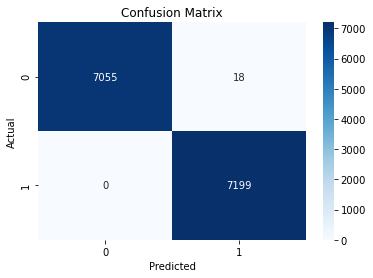

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<a id='try4th'></a>
### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression


In [44]:
lg_reg = LogisticRegression(random_state=0).fit(X_train, y_train)
lg_reg.predict(X_test)
lg_reg.predict_proba(X_test)


array([[0.4851714 , 0.5148286 ],
       [0.52194454, 0.47805546],
       [0.51765119, 0.48234881],
       ...,
       [0.47706577, 0.52293423],
       [0.4996199 , 0.5003801 ],
       [0.49903633, 0.50096367]])

In [45]:
lg_reg.score(X_test, y_test)

0.5144338565022422

<a id='try5th'></a>
### Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9704316143497758


In [48]:
'''
from sklearn import tree
plt.figure(figsize=(20, 6))
tree.plot_tree(DTC, 
          filled=True, 
          rounded=True, 
          fontsize=3)
plt.title("Decision Tree Visualization")
plt.show()
'''

'\nfrom sklearn import tree\nplt.figure(figsize=(20, 6))\ntree.plot_tree(DTC, \n          filled=True, \n          rounded=True, \n          fontsize=3)\nplt.title("Decision Tree Visualization")\nplt.show()\n'

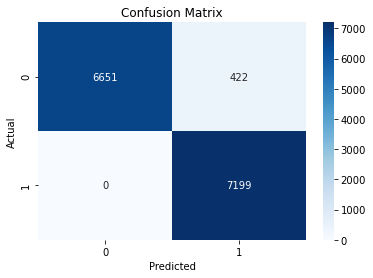

In [49]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<a id='try6'></a>
### Gradient Boosting Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=21)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6280128923766816


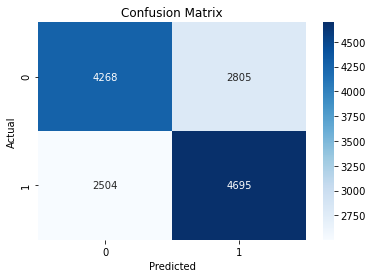

In [51]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<a id='try7'></a>
### SVM Classifier

In [52]:
from sklearn.svm import SVC

In [53]:
X_test.shape

(14272, 14)

In [54]:
y_train.shape

(80874,)

In [60]:
clf = SVC(kernel="linear", C=1.0, gamma="scale")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

KeyboardInterrupt: 

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<a id='tryoc'></a>
### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=150,           # Same as n_estimators in your RF model
    learning_rate=0.1,          # Standard default value
    random_state=42,
    eval_metric='logloss'       # Standard evaluation metric
)
xgb_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Overall Accuracy: {accuracy:.4f}")

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Stroke (0)', 'Stroke (1)']))

In [ ]:
# 5. Visualize Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds',
    xticklabels=['Predicted No Stroke', 'Predicted Stroke'],
    yticklabels=['Actual No Stroke', 'Actual Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost (Oversampled Training)')
plt.show()